# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [39]:
m = 50
n = 12

A, b = main.spare_matrix_Abt(m, n)
A1, b1 = main.square_from_rectan(A, b)

solution1 = np.linalg.solve(A1, b1)
norm1 = main.residual_norm(A1, solution1, b1)
print('Metoda np.linalg.solve:')
tt1 = %timeit -r 10 -n 100 -o main.square_from_rectan(A, b), np.linalg.solve(A1, b1)
print('Norma residuum:', norm1)

solution2 = np.linalg.lstsq(A, b, rcond=None)
norm2 = main.residual_norm(A, solution2, b)
print('\nMetoda np.linalg.lstsq:')
tt2 = %timeit -r 10 -n 100 -o np.linalg.lstsq(A, b, rcond=None)
print('Norma residuum:', norm2)

q, r = np.linalg.qr(A1)
solution3 = sp.linalg.solve_triangular(r, np.transpose(q) @ b1)
norm3 = main.residual_norm(A1, solution3, b1)
print('\nMetoda rozkładu QR:')
tt3 = %timeit -r 10 -n 100 -o np.linalg.qr(A1), sp.linalg.solve_triangular(r, np.transpose(q) @ b1)
print('Norma residuum:', norm3)

U, S, V = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)
solution4 = np.dot(np.transpose(V), np.linalg.solve(S, np.dot(np.transpose(U), b)))
norm4 = main.residual_norm(A, solution4, b)
print('\nMetoda rozkładu SVD:')
tt4 = %timeit -r 10 -n 100 -o np.linalg.svd(A, full_matrices=False), np.diag(S), np.dot(np.transpose(V), np.linalg.solve(S, np.dot(np.transpose(U), b)))
print('Norma residuum:', norm4)

Metoda np.linalg.solve:
35.6 µs ± 4.42 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Norma residuum: 2.18868861352057e-14

Metoda np.linalg.lstsq:
The slowest run took 10.95 times longer than the fastest. This could mean that an intermediate result is being cached.
168 µs ± 202 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Norma residuum: None

Metoda rozkładu QR:
139 µs ± 18.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Norma residuum: 6.052660608233687e-14

Metoda rozkładu SVD:
145 µs ± 64.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Norma residuum: 7.999154773036775e-09


***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

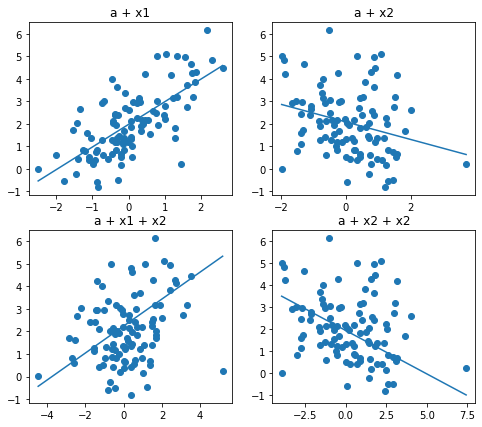

In [10]:
x1 = np.random.normal(0, 1, size=(100, 1))
x2 = np.random.normal(0, 1, size=(100, 1))
epsilon = np.random.normal(0, 1, size=(100, 1))
pred1 = [min(x1), max(x1)]
pred2 = [min(x2), max(x2)]

y = 2 + x1 - 0.5 * x2 + epsilon 
ones = np.ones((100, 1))

conc1 = np.concatenate((ones, x1), 1)
conc2 = np.concatenate((ones, x2), 1)
conc3 = np.concatenate((ones, x1, x2), 1)
conc4 = np.concatenate((ones, x2, x2), 1)

q1, r1 = np.linalg.qr(conc1)
reg1 = sp.linalg.solve_triangular(r1, np.transpose(q1) @ y)
reg1 = reg1[0] + reg1[1] * pred1

q2, r2 = np.linalg.qr(conc2)
reg2 = sp.linalg.solve_triangular(r2, np.transpose(q2) @ y)
reg2 = reg2[0] + reg2[1] * pred2

q3, r3 = np.linalg.qr(conc3)
reg3 = sp.linalg.solve_triangular(r3, np.transpose(q3) @ y)
reg3 = reg3[0] + reg3[1] * x1 + reg3[2] * x2

q4, r4 = np.linalg.qr(conc4)
reg4 = sp.linalg.solve_triangular(r4, np.transpose(q4) @ y)
reg4 = reg4[0] + reg4[1] * x2 + reg4[2] * x2

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.plot(pred1, reg1)
plt.scatter(x1, y)
plt.title('a + x1')

plt.subplot(2, 2, 2)
plt.plot(pred2, reg2)
plt.scatter(x2, y)
plt.title('a + x2')

plt.subplot(2, 2, 3)
plt.plot([min(x1 + x2), max(x1 + x2)], [min(reg3), max(reg3)])
plt.scatter(x1 + x2, y)
plt.title('a + x1 + x2')

plt.subplot(2, 2, 4)
plt.plot([max(x2 + x2), min(x2 + x2)], [min(reg4), max(reg4)])
plt.scatter(x2 + x2, y)
plt.title('a + x2 + x2')

plt.show()

Wnioski
Zapoznałem się z numerycznymi metodami rozwiązywania układów równań liniowych z macierzami prostokątnymi. Porównałem czas wykonywania i zużycie pamięci różnych sposobów rozwiązania takich układów. Wykorzystując rozkład QR policzyłem współczynniki regresji liniowej kilku wyrażeń zawierających wektory losowych wartości rozkładu normalnego.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)